# 2 偏差图deviation

偏差图是单个特征中的所有值与特定值之间的关系图，它反映的是所有值偏离特定值的距离。

## 2.1 发散型条形图

横坐标：里程<br>
纵坐标：各品牌汽车<br>
颜色：小于0显示红色，大于0显示绿色

### 2.1.1 导入需要的绘图库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.1.2 绘制发散型条形图的函数

**plt.hlines()**

plt.hlines()绘制水平的条形图，plt.vlines()绘制垂直的条形图

In [2]:
plt.hlines?

>重要参数
>>y：y轴索引<br>
>>xmin：每行的开头<br>
>>xmax：每行的结尾<br>
>>colors：颜色，默认是'k'(黑色)<br>
>>linestyle：线的类型，可选择{'solid','dashed','dashdot','dotted'}<br>
>>label：标签，默认为空<br>
>>linewidth：线的宽度<br>
>>alpha：色彩饱和度<br>

**绘制一个超级简单的条形图**

In [3]:
#定义数据
x = np.random.rand(10) #随机生成10个[0,1)的数字
x

array([0.93684238, 0.07718332, 0.55033943, 0.66256445, 0.90079698,
       0.12221005, 0.06784068, 0.53771804, 0.71106839, 0.2224055 ])

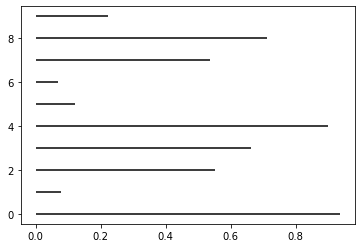

In [4]:
#绘图
plt.hlines(y = range(10), xmin = 0, xmax = x)

（1）让图像顺序排列

In [5]:
#定义数据
x = np.random.rand(10)
x

array([0.84768269, 0.3605695 , 0.23472793, 0.70214829, 0.46505169,
       0.09787476, 0.32494171, 0.53934601, 0.82019151, 0.12448977])

In [8]:
#方法一：
sorted(x, reverse = True)

[0.8476826854151848,
 0.8201915146640699,
 0.7021482879459752,
 0.539346005667087,
 0.46505168504426586,
 0.36056949634046465,
 0.32494170815616064,
 0.234727931420171,
 0.12448977132741801,
 0.09787475889999142]

In [10]:
x #x不变

array([0.84768269, 0.3605695 , 0.23472793, 0.70214829, 0.46505169,
       0.09787476, 0.32494171, 0.53934601, 0.82019151, 0.12448977])

In [11]:
#方法二：
x.sort() #从小到大排序，会直接改变原序列

In [12]:
x #x变

array([0.09787476, 0.12448977, 0.23472793, 0.32494171, 0.3605695 ,
       0.46505169, 0.53934601, 0.70214829, 0.82019151, 0.84768269])

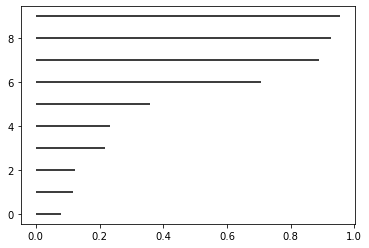

In [13]:
#定义数据
x = np.random.rand(10)

#对数据进行排序
x.sort()
#x = sorted(x, reverse = False)

#绘图
plt.hlines(y = range(10), xmin = 0, xmax = x)

【注意】plt.hlines()的图像是从下往上以此画出的，.sort()返回的结果是从小到大排列，与图像从下往上的顺序吻合。

（2）让图像的线变宽一点

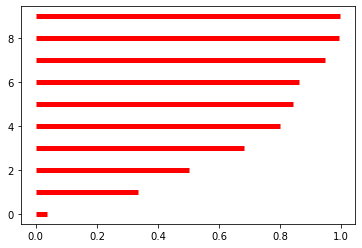

In [14]:
#定义数据
x = np.random.rand(10)

#对数据进行排序
x.sort()
#x = sorted(x, reverse = False)

#绘图
plt.hlines(y = range(10), xmin = 0, xmax = x
          ,linewidth = 5
          ,color = 'red'
          )

（3）让图像基于均值分成两部分

In [16]:
#定义数据
x = np.random.rand(10)
x = x - x.mean() #均值变为0
x.sort()

In [17]:
x

array([-0.4856031 , -0.39798395, -0.35297197, -0.12886326, -0.11448125,
        0.14947369,  0.19527534,  0.37495071,  0.37986931,  0.38033447])

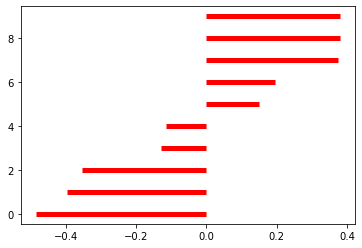

In [18]:
#绘图
plt.hlines(y = range(10)
          ,xmin = 0
          ,xmax = x
          ,linewidth = 5
          ,color = 'red'
          )

（4）让两部分显示不同的颜色

In [20]:
colors = []
for i in x:
    if i < 0:
        colors.append('red')
    else:
        colors.append('green')
colors

['red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green']

In [24]:
colors = ['red' if i < 0 else 'green' for i in x]

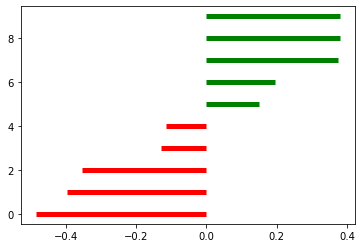

In [25]:
#绘图
plt.hlines(y = range(10)
          ,xmin = 0
          ,xmax = x
          ,linewidth = 5
          ,color = colors
          )

（5）让颜色变浅一点

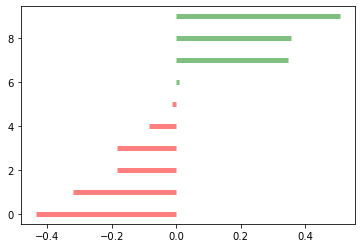

In [27]:
#定义数据
x = np.random.rand(10)
x = x - x.mean()
x.sort()

#绘图
plt.hlines(y = range(10)
          ,xmin = 0
          ,xmax = x
          ,linewidth = 5
          ,color = ['red' if i < 0 else 'green' for i in x]
          ,alpha = 0.5
          )

### 2.1.3 认识绘图所需的数据集

In [30]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')

In [31]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [32]:
df.shape

(32, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mpg      32 non-null     float64
 1   cyl      32 non-null     int64  
 2   disp     32 non-null     float64
 3   hp       32 non-null     int64  
 4   drat     32 non-null     float64
 5   wt       32 non-null     float64
 6   qsec     32 non-null     float64
 7   vs       32 non-null     int64  
 8   am       32 non-null     int64  
 9   gear     32 non-null     int64  
 10  carb     32 non-null     int64  
 11  fast     32 non-null     int64  
 12  cars     32 non-null     object 
 13  carname  32 non-null     object 
dtypes: float64(5), int64(7), object(2)
memory usage: 3.6+ KB


In [35]:
sum(df.cars == df.carname) #判断特征cars与carname的区别

32

In [36]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'fast', 'cars', 'carname'],
      dtype='object')

In [37]:
#横坐标
df.mpg.values

array([4.58257569, 4.58257569, 4.77493455, 4.6260134 , 4.32434966,
       4.25440948, 3.78153408, 4.93963561, 4.77493455, 4.38178046,
       4.21900462, 4.04969135, 4.15932687, 3.89871774, 3.2249031 ,
       3.2249031 , 3.8340579 , 5.69209979, 5.5136195 , 5.82237065,
       4.63680925, 3.93700394, 3.89871774, 3.64691651, 4.38178046,
       5.22494019, 5.09901951, 5.5136195 , 3.97492138, 4.4384682 ,
       3.87298335, 4.6260134 ])

In [38]:
#纵坐标
df.cars.values

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

### 2.1.4 绘制基础图形

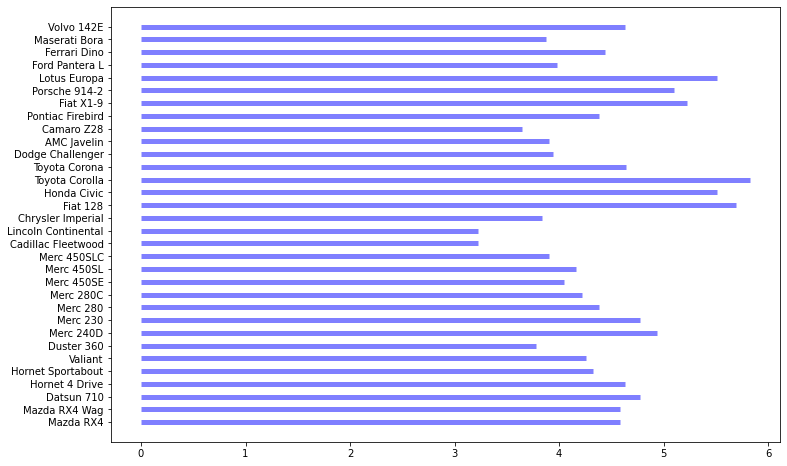

In [39]:
#添加并设置画布大小
plt.figure(figsize = (12,8))

#绘图
plt.hlines(y = df.cars
          ,xmin = 0
          ,xmax = df.mpg
          ,color = 'b'
          ,alpha = 0.5
          ,linewidth = 5
          )

### 2.1.5 对目标数据进行格式变换

#### 2.1.5.1 提取目标数据并进行标准化处理

In [40]:
#提取出mpg这一列所有的数据
x = df.loc[:,'mpg']

In [41]:
x

0     4.582576
1     4.582576
2     4.774935
3     4.626013
4     4.324350
5     4.254409
6     3.781534
7     4.939636
8     4.774935
9     4.381780
10    4.219005
11    4.049691
12    4.159327
13    3.898718
14    3.224903
15    3.224903
16    3.834058
17    5.692100
18    5.513620
19    5.822371
20    4.636809
21    3.937004
22    3.898718
23    3.646917
24    4.381780
25    5.224940
26    5.099020
27    5.513620
28    3.974921
29    4.438468
30    3.872983
31    4.626013
Name: mpg, dtype: float64

In [42]:
#z-score标准化处理
df['mpg_z'] = (x - x.mean())/x.std()

In [43]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0.223563
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0.223563
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0.514515
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0.289265
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,-0.167015


In [44]:
df['mpg_z'].values

array([ 0.22356336,  0.22356336,  0.51451502,  0.2892649 , -0.16701545,
       -0.27280321, -0.98804909,  0.76363298,  0.51451502, -0.08014871,
       -0.32635469, -0.58244884, -0.41662005, -0.8108034 , -1.82997917,
       -1.82997917, -0.90860438,  1.9017698 ,  1.63181012,  2.0988105 ,
        0.30559411, -0.75289375, -0.8108034 , -1.19166439, -0.08014871,
        1.19516933,  1.00470849,  1.63181012, -0.69554186,  0.00559412,
       -0.84972785,  0.2892649 ])

#### 2.1.5.2 生成颜色标签

In [45]:
df['colors'] = ['green' if i > 0 else 'red' for i in df['mpg_z']]

In [46]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0.223563,green
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0.223563,green
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0.514515,green
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0.289265,green
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,-0.167015,red


In [47]:
df['colors'].value_counts()

red      17
green    15
Name: colors, dtype: int64

#### 2.1.5.3 对数据集进行排序

In [48]:
df.sort_values('mpg_z', inplace = True)

In [49]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


In [52]:
df.reset_index()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red
5,5,3.872983,8,301.0,335,3.54,3.570,14.60,0,1,5,8,0,Maserati Bora,Maserati Bora,-0.849728,red
6,6,3.898718,8,275.8,180,3.07,3.780,18.00,0,0,3,3,0,Merc 450SLC,Merc 450SLC,-0.810803,red
7,7,3.898718,8,304.0,150,3.15,3.435,17.30,0,0,3,2,0,AMC Javelin,AMC Javelin,-0.810803,red
8,8,3.937004,8,318.0,150,2.76,3.520,16.87,0,0,3,2,0,Dodge Challenger,Dodge Challenger,-0.752894,red
9,9,3.974921,8,351.0,264,4.22,3.170,14.50,0,1,5,4,0,Ford Pantera L,Ford Pantera L,-0.695542,red


In [53]:
#重置索引
df.reset_index(drop = True, inplace = True)

In [54]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


### 2.1.6 绘制目标图形

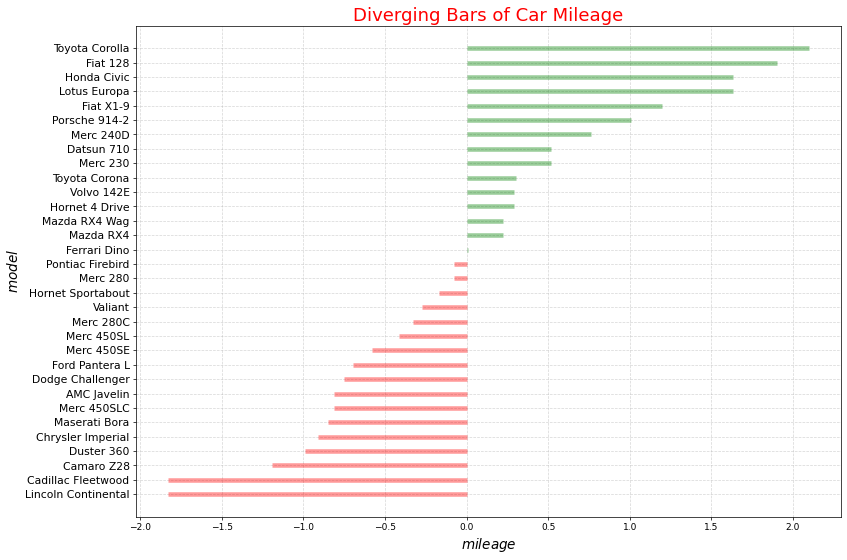

In [56]:
#创建画布
plt.figure(figsize = (14,10), dpi = 65)

#绘制基础图形
plt.hlines(y = df.cars
          ,xmin = 0
          ,xmax = df.mpg_z
          ,color = df.colors
          ,alpha = 0.4
          ,linewidth = 5
          )

#添加装饰
plt.ylabel('$model$', fontsize = 15)
plt.xlabel('$mileage$', fontsize = 15)
plt.yticks(fontsize = 12) #y轴刻度标签
plt.title('Diverging Bars of Car Mileage', fontdict = {'size': 20, 'color': 'r'}) #设置图形标题
plt.grid(linestyle = '--', alpha = 0.5) #配置网格线

### 2.1.7 图形解读

相同油耗内里程数最小的是林肯大陆<br>
位于均值线上的是法拉利迪诺<br>
油耗里程数最大的是丰田卡罗拉

### 2.1.8 用Kmeans聚类验证发散型条形图聚类效果

#### 2.1.8.1 根据发散型条形图结果给原数据集添加标签

In [57]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


In [58]:
df['label'] = [1 if i == 'red' else 0 for i in df.colors]

In [59]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors,label
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red,1
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red,1
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red,1
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red,1
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red,1


#### 2.1.8.2 利用Kmeans算法对原数据集进行聚类

In [60]:
from sklearn.cluster import KMeans

In [61]:
df1 = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')

In [62]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [63]:
df1.mpg.values

array([4.58257569, 4.58257569, 4.77493455, 4.6260134 , 4.32434966,
       4.25440948, 3.78153408, 4.93963561, 4.77493455, 4.38178046,
       4.21900462, 4.04969135, 4.15932687, 3.89871774, 3.2249031 ,
       3.2249031 , 3.8340579 , 5.69209979, 5.5136195 , 5.82237065,
       4.63680925, 3.93700394, 3.89871774, 3.64691651, 4.38178046,
       5.22494019, 5.09901951, 5.5136195 , 3.97492138, 4.4384682 ,
       3.87298335, 4.6260134 ])

In [64]:
#提取出目标数据，由于sklearn不接受一维数据，所以需要对目标数据进行变换
data_x = df1.mpg.values.reshape(-1,1)

In [65]:
data_x.shape

(32, 1)

In [66]:
#聚类
cluster = KMeans(n_clusters = 2, random_state = 0).fit(data_x)

In [67]:
cluster.labels_

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [68]:
df1['label'] = cluster.labels_

In [69]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,label
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,1


In [70]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors,label
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red,1
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red,1
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red,1
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red,1
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red,1


In [72]:
df1.sort_values('mpg', inplace = True)

In [73]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,label
15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,1
14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,1
23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,1
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,1
16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,1


In [75]:
df1.reset_index(inplace = True) #重置索引

In [77]:
df1.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,label
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,1
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,1
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,1
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,1
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,1


In [78]:
sum(df['label'] == df1['label'])

31

In [79]:
#准确率
(df['label'] == df1['label']).mean()

0.96875

In [80]:
#查看唯一一个分错类的数据
df[df['label'] != df1['label']]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors,label
17,4.438468,6,145.0,175,3.62,2.77,15.5,0,1,5,6,1,Ferrari Dino,Ferrari Dino,0.005594,green,0
